In [1]:
import re, json
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
PATH = '/dataset/'

In [3]:
TRAIN_DATA = 'train.csv'
TEST_DATA = 'test.csv'

FEATURE = 'features.csv'

STORE = 'stores.csv'

## 1. 데이터 필드확인

#### [1] train.csv / test.csv

In [4]:
train_df = pd.read_csv(PATH + TRAIN_DATA)

test_df = pd.read_csv(PATH + TEST_DATA)

* train 속성

1. Store : 상점 번호
2. Dept : 부서 번호
3. Date : the week
4. Weekly_Sales : 지정된 상점에서 지정된 부서의 판매 매출 금액
5. isHoliday : 특별한 휴일 주가 맞는지 아닌지

In [5]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [6]:
test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


#### [2] features.csv

In [7]:
feature_df = pd.read_csv(PATH + FEATURE)

* feature 속성

1. Store : 상점 번호
2. Date : the week
3. Temperature : 해당 지역의 평균 온도
4. Fuel_Price : 그 지역의 연료비
5. MarkDown 1~5 : 월마트에서 휴일 이전 판매에 대해 실행 한 판촉 가격 인하와 관련된 데이터로, 2011년 11월 이후에만 사용할 수 있으며 일부 상점에서는 항상 사용할 수 없다. 누락 값은 Nan으로 표기
6. CPI : 소비자 물가 지수
7. Unemployment : 매장이 위치한 지역의 실업률
8. IsHoliday : 특별한 휴일 주가 맞는지 아닌지

In [8]:
feature_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


#### [3] stores.csv

In [9]:
store_df = pd.read_csv(PATH + STORE)

* store 정보

1. Store : 상점 번호
2. Type : 상점 타입
3. Size : 상점 크기

In [10]:
store_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


## 2. 데이터 분석

#### train + test 합치기

* 나중에 split 하기( target인 Weekly_Sales가 Nan 데이터 뽑으면 test임!)

In [11]:
print("train len ", len(train_df))
print("test len : ", len(test_df))

train len  421570
test len :  115064


In [12]:
test_df["Weekly_Sales"] = np.nan

In [13]:
total_df = pd.concat([train_df,test_df], ignore_index=True)

In [14]:
print("total len ", len(total_df))

total len  536634


In [15]:
total_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
536629,45,98,2013-06-28,NaN,False
536630,45,98,2013-07-05,NaN,False
536631,45,98,2013-07-12,NaN,False
536632,45,98,2013-07-19,NaN,False


#### store과 feature도 합치기
* 필요 없는 컬럼이면 그때 삭제하기

=> store와 feature은 Store를 기반으로 merge 하기

In [16]:
total_df = total_df.merge(store_df, how = 'left')
total_df = total_df.merge(feature_df, how = 'left')

In [17]:
total_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536629,45,98,2013-06-28,NaN,False,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
536630,45,98,2013-07-05,NaN,False,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
536631,45,98,2013-07-12,NaN,False,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
536632,45,98,2013-07-19,NaN,False,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN


#### isHoliday => 0과 1로 변경

In [18]:
total_df['IsHoliday'] = total_df['IsHoliday'].astype('str').map({'True':0,'False':1})

#### Date 속성을 모델에 넣을 수 없으니까 year, month, day, week(한 주)로 컬럼 생성

In [19]:
total_df["Date"] = pd.to_datetime(total_df.Date)

In [20]:
total_df["Year"] = total_df.Date.dt.year
total_df["Month"] = total_df.Date.dt.month
total_df["Week"] = total_df.Date.dt.week

#total_df.drop("Date", axis=1, inplace=True) # 일단 drop x => 나중에 test 나눌때 아이디 만들때 필요

<ipython-input-20-cda5c09ce305>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  total_df["Week"] = total_df.Date.dt.week


#### 년도 별 주차 확인

* Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 => 2010-5주차, 2011-6주차, 2012-6주차
* Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 => 2010-36주차, 2011-36주차, 2012-36주차
* Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13 => 2010-47주차, 2011-47주차, 2012-47주차
* Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13 => 2010-52주차, 2011-52주차, 2012-52주차

<AxesSubplot:xlabel='Week', ylabel='Weekly_Sales'>

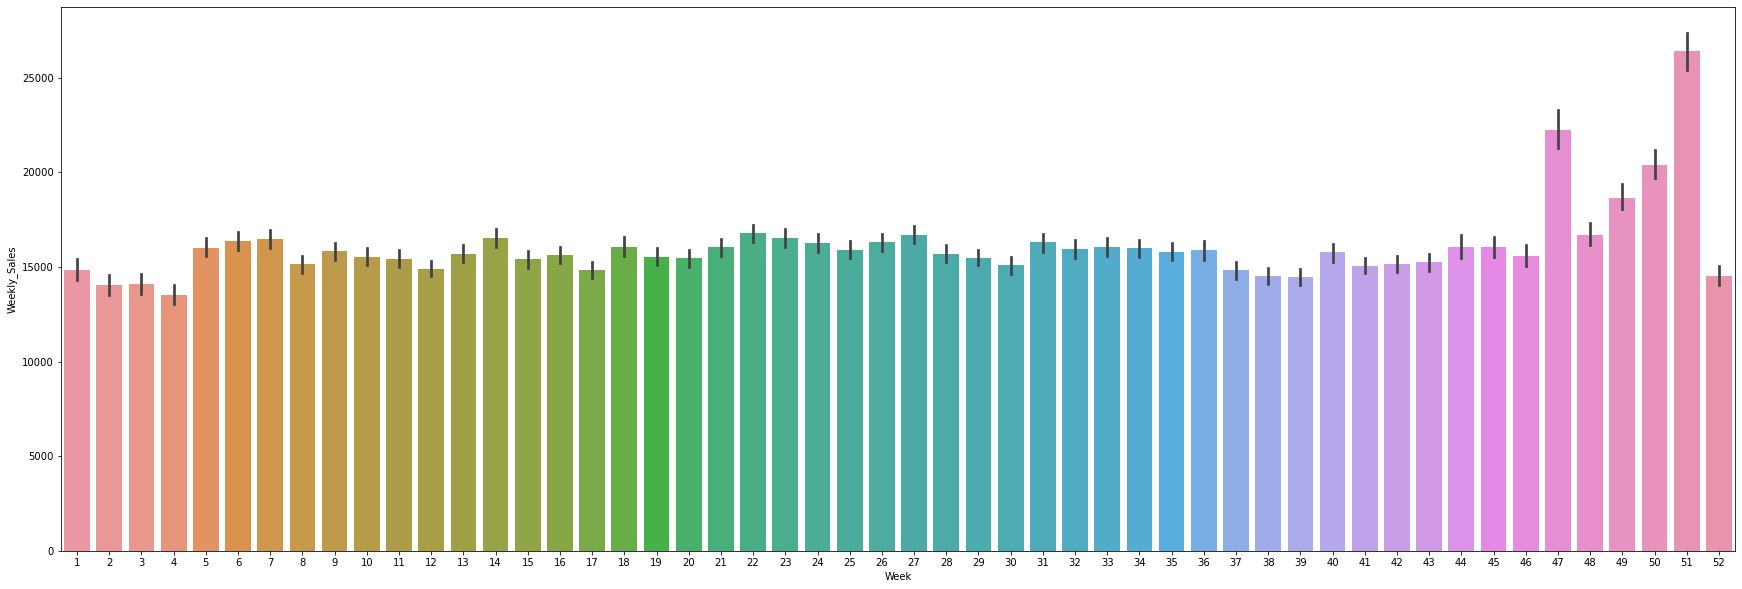

In [21]:
plt.figure(figsize=(30, 10))
sns.barplot(x='Week', y='Weekly_Sales', data=total_df)

<AxesSubplot:xlabel='Week', ylabel='Weekly_Sales'>

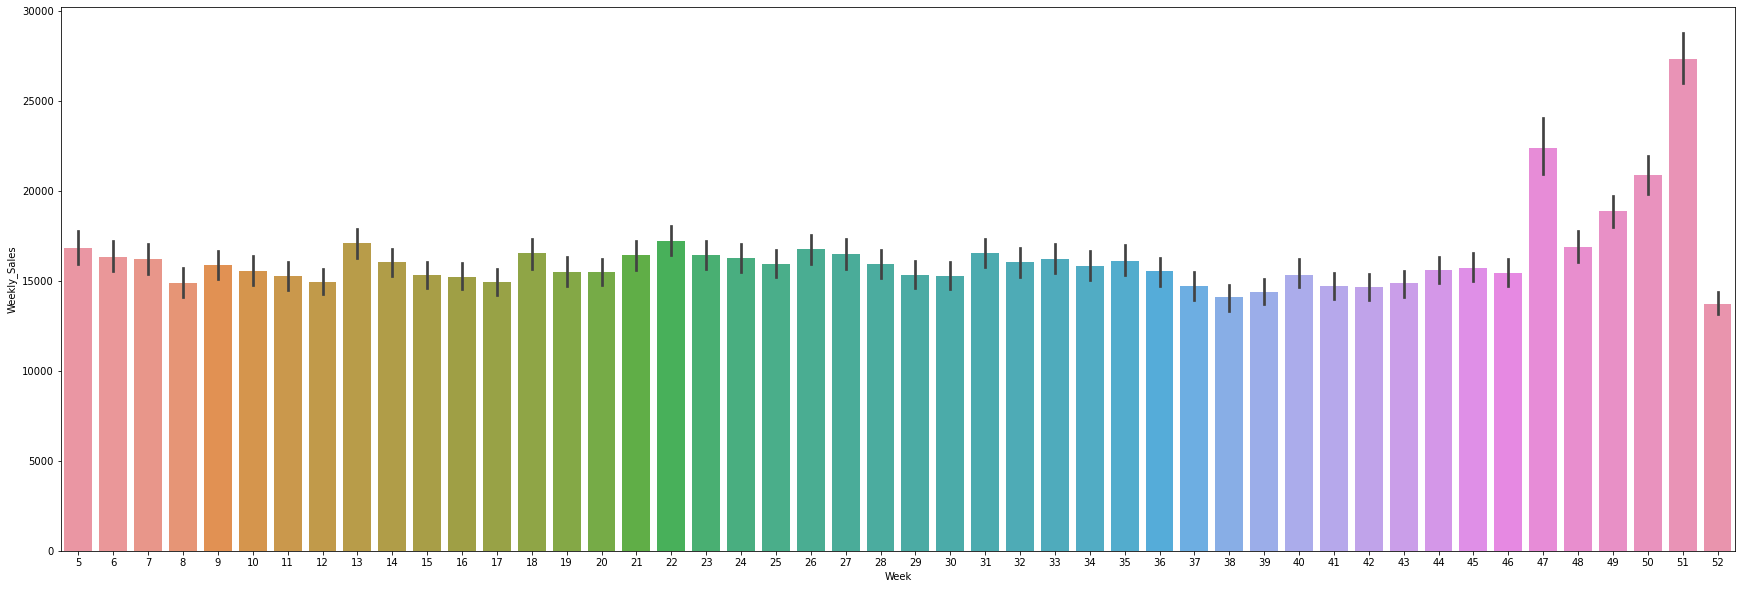

In [22]:
plt.figure(figsize=(30, 10))
sns.barplot(x='Week', y='Weekly_Sales', data=total_df[total_df['Year'] == 2010])

<AxesSubplot:xlabel='Week', ylabel='Weekly_Sales'>

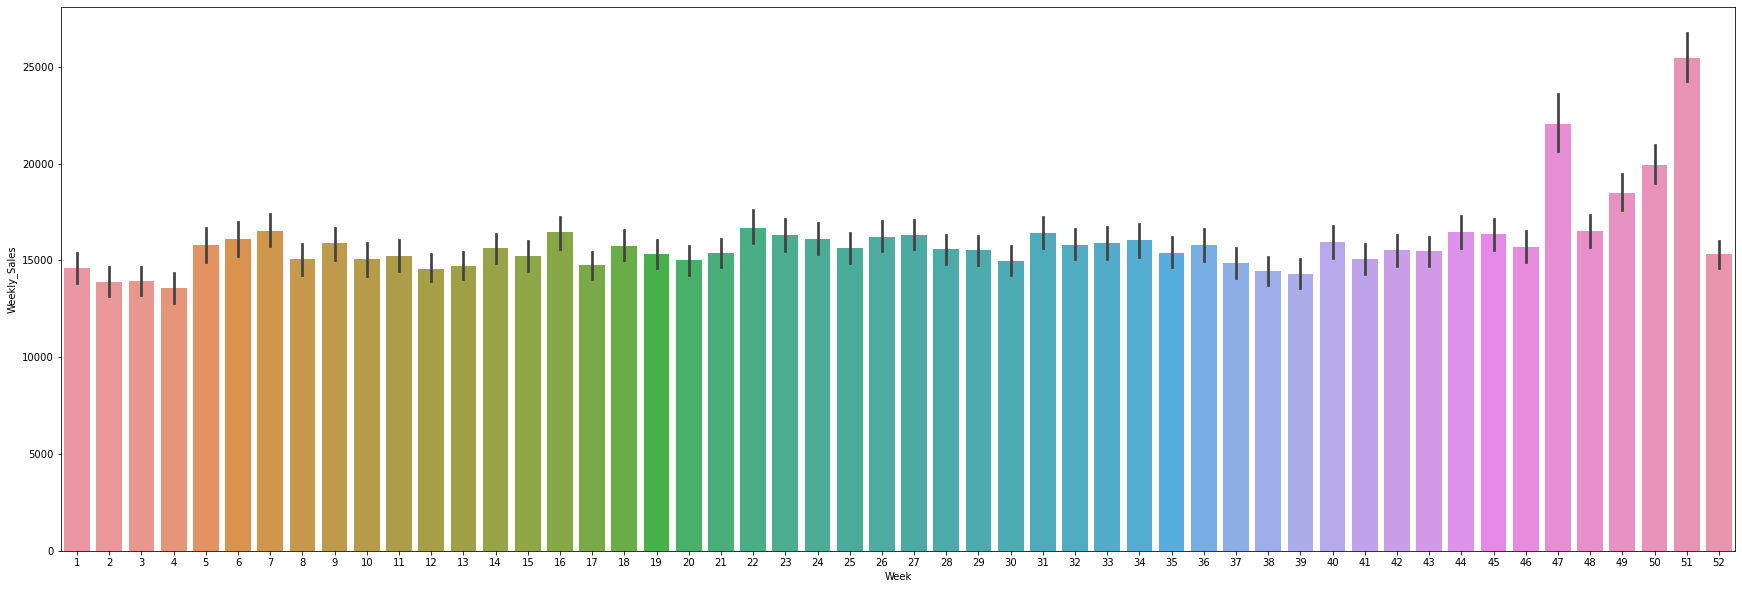

In [23]:
plt.figure(figsize=(30, 10))
sns.barplot(x='Week', y='Weekly_Sales', data=total_df[total_df['Year'] == 2011])

<AxesSubplot:xlabel='Week', ylabel='Weekly_Sales'>

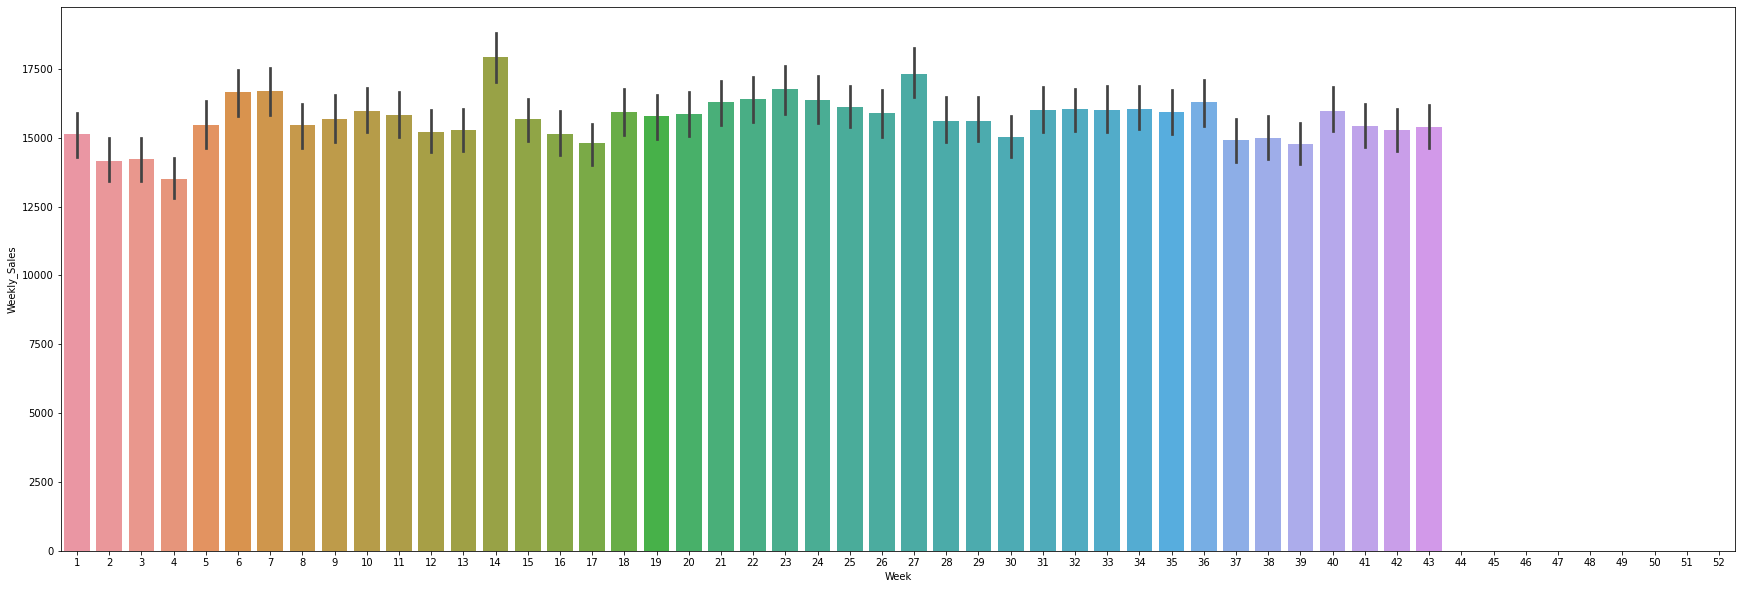

In [24]:
plt.figure(figsize=(30, 10))
sns.barplot(x='Week', y='Weekly_Sales', data=total_df[total_df['Year'] == 2012])

* 2013년도는 test_df임 => 그래서 그래프 x
* 1년은 약 52주로 되어 있음plt.figure(figsize=(20, 15))
sns.barplot(x='Week', y='Weekly_Sales', data=year_groups_train[0])

* 달 영향 있음
    1. 1월~2월
    2. 11월~12월

### [1] Nan을 가진 컬럼 찾기

In [25]:
total_df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales    115064
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       271038
MarkDown2       338949
MarkDown3       294308
MarkDown4       299491
MarkDown5       270138
CPI              38162
Unemployment     38162
Year                 0
Month                0
Week                 0
dtype: int64

* Weekly_Sales    115064 => test 섞여서 nan이 있는거 => pass
* MarkDown 1~5 : nan 존재 많음 => test에만 이 속성 값이 거의 존재 => train은 거의 없음 => 제거
* CPI              38162 => test에 null 존재
* Unemployment     38162 => test에 null 존재

In [26]:
train_temp_df = train_df.merge(feature_df, how = 'left')
test_temp_df = test_df.merge(feature_df, how = 'left')

In [27]:
train_temp_df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [28]:
test_temp_df.isnull().sum()

Store                0
Dept                 0
Date                 0
IsHoliday            0
Weekly_Sales    115064
Temperature          0
Fuel_Price           0
MarkDown1          149
MarkDown2        28627
MarkDown3         9829
MarkDown4        12888
MarkDown5            0
CPI              38162
Unemployment     38162
dtype: int64

* MarkDown이 차지하는 Null의 비율은?

In [29]:
print("MarDown 1 null rate : ", total_df["MarkDown1"].isnull().sum()/len(total_df)*100)
print("MarDown 2 null rate : ", total_df["MarkDown2"].isnull().sum()/len(total_df)*100)
print("MarDown 3 null rate : ", total_df["MarkDown3"].isnull().sum()/len(total_df)*100)
print("MarDown 4 null rate : ", total_df["MarkDown4"].isnull().sum()/len(total_df)*100)
print("MarDown 5 null rate : ", total_df["MarkDown5"].isnull().sum()/len(total_df)*100)

MarDown 1 null rate :  50.50704949742283
MarDown 2 null rate :  63.16204340388422
MarDown 3 null rate :  54.843338290156794
MarDown 4 null rate :  55.80917347764025
MarDown 5 null rate :  50.33933742550789


* null을 너무 많이 차지하니까 해당 col은 제거!

In [30]:
total_df.drop('MarkDown1', axis=1, inplace=True)
total_df.drop('MarkDown2', axis=1, inplace=True)
total_df.drop('MarkDown3', axis=1, inplace=True)
total_df.drop('MarkDown4', axis=1, inplace=True)
total_df.drop('MarkDown5', axis=1, inplace=True)

In [31]:
total_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
0,1,1,2010-02-05,24924.50,1,A,151315,42.31,2.572,211.096358,8.106,2010,2,5
1,1,1,2010-02-12,46039.49,0,A,151315,38.51,2.548,211.242170,8.106,2010,2,6
2,1,1,2010-02-19,41595.55,1,A,151315,39.93,2.514,211.289143,8.106,2010,2,7
3,1,1,2010-02-26,19403.54,1,A,151315,46.63,2.561,211.319643,8.106,2010,2,8
4,1,1,2010-03-05,21827.90,1,A,151315,46.50,2.625,211.350143,8.106,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536629,45,98,2013-06-28,NaN,1,B,118221,76.05,3.639,NaN,NaN,2013,6,26
536630,45,98,2013-07-05,NaN,1,B,118221,77.50,3.614,NaN,NaN,2013,7,27
536631,45,98,2013-07-12,NaN,1,B,118221,79.37,3.614,NaN,NaN,2013,7,28
536632,45,98,2013-07-19,NaN,1,B,118221,82.84,3.737,NaN,NaN,2013,7,29


* CPI-UnEmployee(년-월의 평균값을 결측값에 넣는다 => 결측 제거)

In [32]:
print("Unemployment null rate : ", total_df["Unemployment"].isnull().sum()/len(total_df)*100)

Unemployment null rate :  7.111364542686449


In [33]:
print("CPI null rate : ", total_df["CPI"].isnull().sum()/len(total_df)*100)

CPI null rate :  7.111364542686449


In [34]:
total_df[total_df['CPI'].isnull()].Year.unique()

array([2013])

In [35]:
total_df[(total_df['CPI'].isnull())]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
421596,1,1,2013-05-03,NaN,1,A,151315,66.66,3.386,NaN,NaN,2013,5,18
421597,1,1,2013-05-10,NaN,1,A,151315,63.90,3.392,NaN,NaN,2013,5,19
421598,1,1,2013-05-17,NaN,1,A,151315,69.53,3.454,NaN,NaN,2013,5,20
421599,1,1,2013-05-24,NaN,1,A,151315,77.19,3.494,NaN,NaN,2013,5,21
421600,1,1,2013-05-31,NaN,1,A,151315,78.02,3.466,NaN,NaN,2013,5,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536629,45,98,2013-06-28,NaN,1,B,118221,76.05,3.639,NaN,NaN,2013,6,26
536630,45,98,2013-07-05,NaN,1,B,118221,77.50,3.614,NaN,NaN,2013,7,27
536631,45,98,2013-07-12,NaN,1,B,118221,79.37,3.614,NaN,NaN,2013,7,28
536632,45,98,2013-07-19,NaN,1,B,118221,82.84,3.737,NaN,NaN,2013,7,29


In [36]:
total_df[(~total_df['CPI'].isnull()) & (total_df['Year'] == 2013)]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
421579,1,1,2013-01-04,NaN,1,A,151315,41.73,3.161,224.080983,6.525,2013,1,1
421580,1,1,2013-01-11,NaN,1,A,151315,50.32,3.243,224.201552,6.525,2013,1,2
421581,1,1,2013-01-18,NaN,1,A,151315,42.92,3.237,224.235813,6.525,2013,1,3
421582,1,1,2013-01-25,NaN,1,A,151315,53.37,3.227,224.235552,6.525,2013,1,4
421583,1,1,2013-02-01,NaN,1,A,151315,56.46,3.244,224.235290,6.525,2013,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536616,45,98,2013-03-29,NaN,1,B,118221,40.68,3.784,193.442790,8.625,2013,3,13
536617,45,98,2013-04-05,NaN,1,B,118221,43.94,3.763,193.516047,8.335,2013,4,14
536618,45,98,2013-04-12,NaN,1,B,118221,57.39,3.724,193.589304,8.335,2013,4,15
536619,45,98,2013-04-19,NaN,1,B,118221,56.27,3.676,193.589304,8.335,2013,4,16


/home/ai-sjjy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


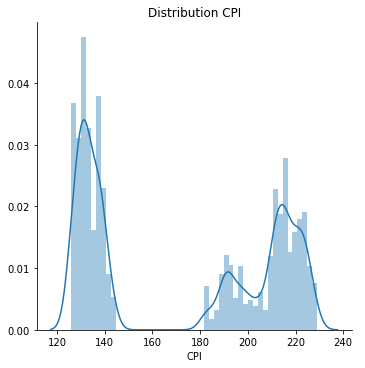

In [37]:
sns.FacetGrid(total_df, height=5).map(sns.distplot, "CPI").add_legend()
plt.title("Distribution CPI")
plt.show()

/home/ai-sjjy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


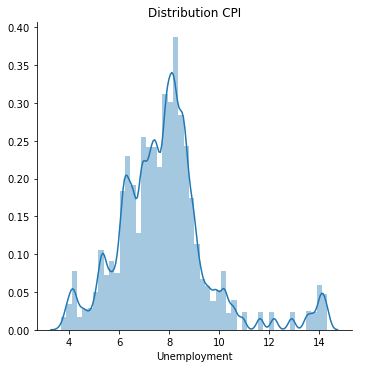

In [38]:
sns.FacetGrid(total_df, height=5).map(sns.distplot, "Unemployment").add_legend()
plt.title("Distribution CPI")
plt.show()

/home/ai-sjjy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


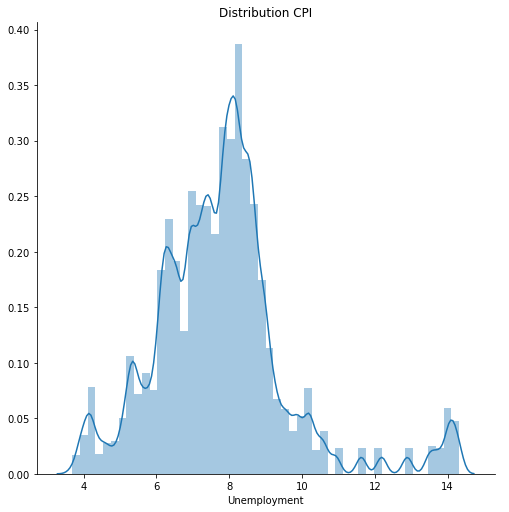

In [39]:
sns.FacetGrid(total_df, height=7).map(sns.distplot, "Unemployment").add_legend()
plt.title("Distribution CPI")
plt.show()

### [2] Store 데이터와 Target = Weekly_Sales의 상관관계

In [40]:
store_feature = store_df.columns.tolist()
store_feature

['Store', 'Type', 'Size']

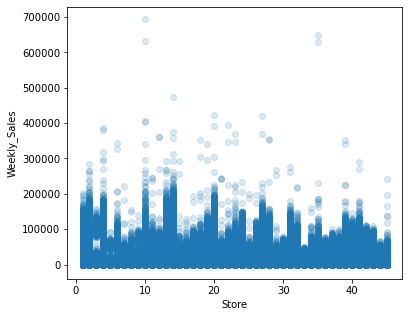

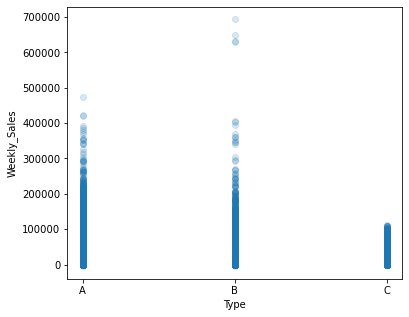

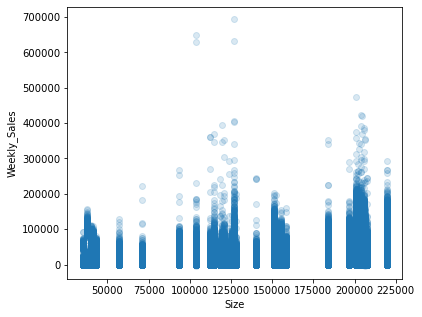

In [41]:
for sf in store_feature:
    plt.figure(figsize=(6, 5))
    plt.scatter(total_df[sf], total_df['Weekly_Sales'], alpha=0.169)
    plt.ylabel("Weekly_Sales")
    plt.xlabel(sf)

### [3] feature 데이터와 Target = Weekly_Sales의 상관관계

In [42]:
feature_feature = [f for f in feature_df.columns.tolist() if 'MarkDown' not in f]
feature_feature.remove

<function list.remove(value, /)>

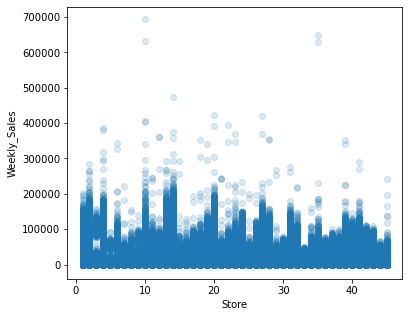

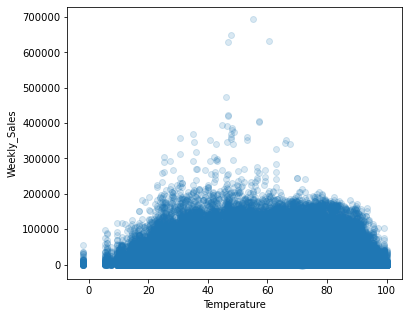

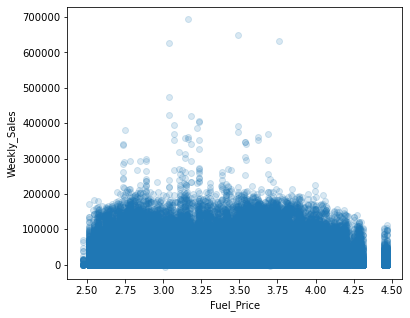

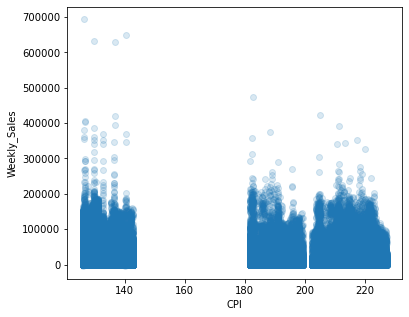

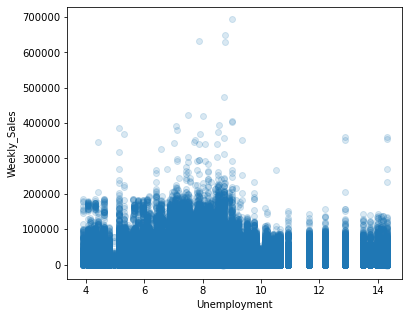

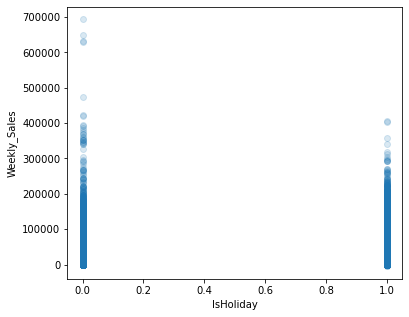

In [43]:
for ff in ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']:
    plt.figure(figsize=(6, 5))
    plt.scatter(total_df[ff], total_df['Weekly_Sales'], alpha=0.169)
    plt.ylabel("Weekly_Sales")
    plt.xlabel(ff)

### [4] 데이터 전체 상관관계 확인

#### [4-1] 데이터 타입 확인

* 범주형 데이터 => Type
* bool 값 => IsHoliday

In [44]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536634 entries, 0 to 536633
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         536634 non-null  int64         
 1   Dept          536634 non-null  int64         
 2   Date          536634 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     536634 non-null  int64         
 5   Type          536634 non-null  object        
 6   Size          536634 non-null  int64         
 7   Temperature   536634 non-null  float64       
 8   Fuel_Price    536634 non-null  float64       
 9   CPI           498472 non-null  float64       
 10  Unemployment  498472 non-null  float64       
 11  Year          536634 non-null  int64         
 12  Month         536634 non-null  int64         
 13  Week          536634 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(7), object(1)
memory usage: 

* Type 0은 D로 채우기

In [45]:
total_df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

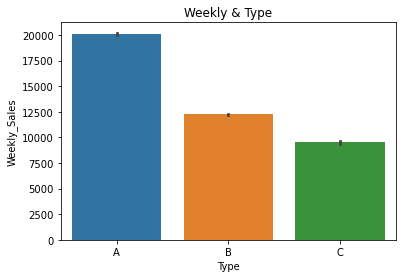

In [46]:
plt.title("Weekly & Type")
plot = sns.barplot(x='Type', y='Weekly_Sales', data=total_df)

* one-hot encoding

In [47]:
temp_df = pd.get_dummies(total_df['Type'], prefix='Type')
total_df.drop('Type', axis=1, inplace=True)
total_df = pd.concat((total_df, temp_df), axis=1)

#### [4-2] 상광관계

In [48]:
corr = total_df.corr()

In [49]:
corr.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Size', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week', 'Type_A',
       'Type_B', 'Type_C'],
      dtype='object')

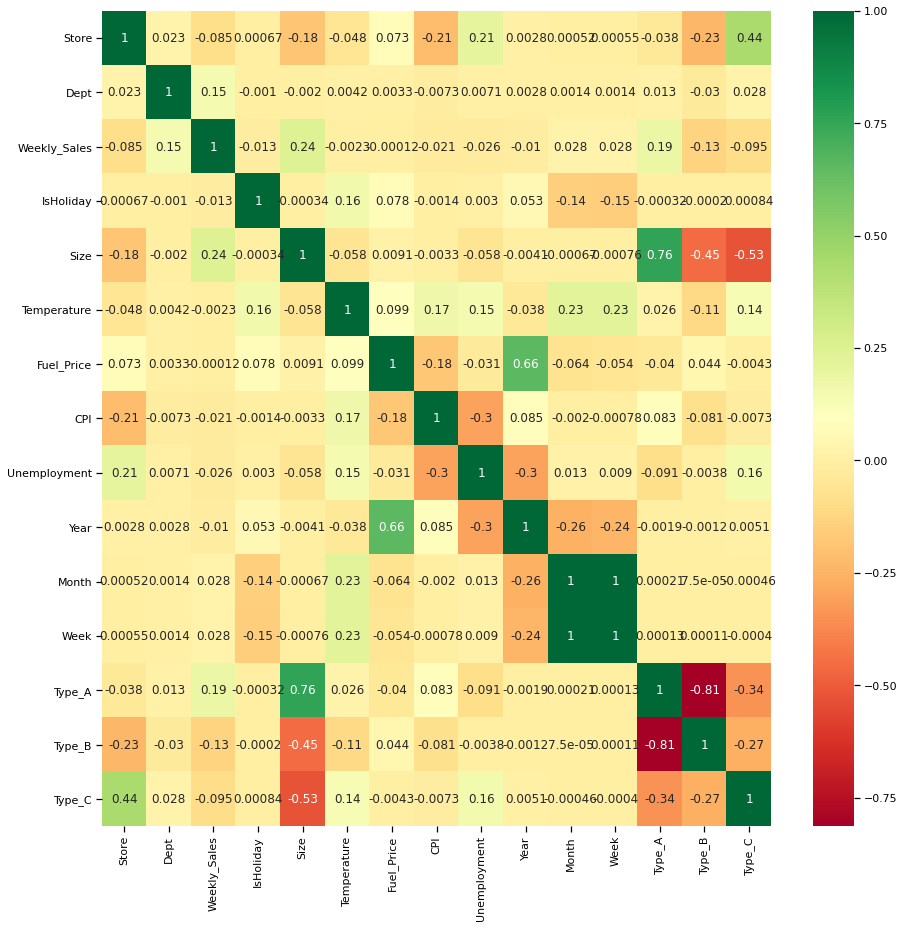

In [50]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(15, 15))
g = sns.heatmap(corr,annot=True,cmap="RdYlGn")

* Weekly_Sale와 상관관계가 0.2이하인 데이터는 빼고 보기

=> 그랬더니, ['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
    중에 

In [51]:
temp_corr = corr[['Weekly_Sales']]

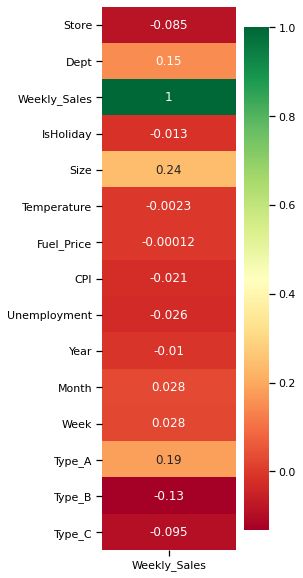

In [52]:
plt.figure(figsize=(3, 10))
g = sns.heatmap(temp_corr,annot=True,cmap="RdYlGn")

<AxesSubplot:>

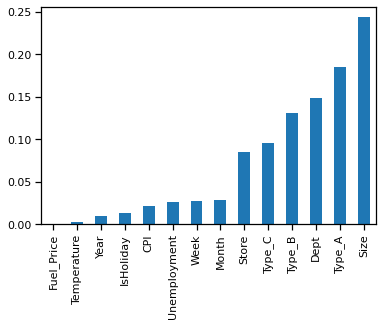

In [53]:
corr['Weekly_Sales'].abs().sort_values()[:-1].plot(kind='bar')

#### [4-3] 사용할 속성 지정

col = ['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size','Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Week']

1. month == week(상관 관계)
    
    => month col 지움 (week는 주별이기 때문에 예측할(주별 매출액)에 적합하다고 판단!)

2. temparature, Fuel_price 너무 낮은 상관관계
    
    => temparature, Fuel_price 제거하고 진행

In [54]:
total_df.drop("Month", axis=1, inplace=True)
total_df.drop("Temperature", axis=1, inplace=True)
total_df.drop("Fuel_Price", axis=1, inplace=True)

In [55]:
total_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,CPI,Unemployment,Year,Week,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,1,151315,211.096358,8.106,2010,5,1,0,0
1,1,1,2010-02-12,46039.49,0,151315,211.242170,8.106,2010,6,1,0,0
2,1,1,2010-02-19,41595.55,1,151315,211.289143,8.106,2010,7,1,0,0
3,1,1,2010-02-26,19403.54,1,151315,211.319643,8.106,2010,8,1,0,0
4,1,1,2010-03-05,21827.90,1,151315,211.350143,8.106,2010,9,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536629,45,98,2013-06-28,NaN,1,118221,NaN,NaN,2013,26,0,1,0
536630,45,98,2013-07-05,NaN,1,118221,NaN,NaN,2013,27,0,1,0
536631,45,98,2013-07-12,NaN,1,118221,NaN,NaN,2013,28,0,1,0
536632,45,98,2013-07-19,NaN,1,118221,NaN,NaN,2013,29,0,1,0


* 일단 3개로 나눔

=> 여기서 나머지 : 'Store', 'Dept', 'Weekly_Sales', 'Type_A', 'Type_B',' Type_C', 'Size', 'Year', 'Week'

1. total_df1 = 나머지 + 'IsHoliday'
2. total_df2 = 나머지 
3. total_df3 = 'CPI', 'Unemployment' + 나머지 + 'IsHoliday' 

=> CPI 설정 떄문에 일단 PASS

In [57]:
# [1] total_df1 = 나머지 + HOliday

total_df1 = total_df[['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Type_A', 'Type_B','Type_C', 'Size', 'Year', 'Week', 'Date']]
total_df1.to_csv(PATH+'clean_dataset1.csv', index=False)

In [58]:
# [2] total_df1 = 나머지

total_df2 = total_df[['Store', 'Dept', 'Weekly_Sales', 'Type_A', 'Type_B','Type_C', 'Size', 'Year', 'Week', 'Date']]
total_df2.to_csv(PATH+'clean_dataset2.csv', index=False)

In [61]:
# [3] CPI처리
recent_CPI = total_df[~total_df['CPI'].isnull()]['CPI'].tolist()[-1] #가장 최근값
recent_Unemployment = total_df[~total_df['Unemployment'].isna()]['Unemployment'].tolist()[-1] #가장 최근값

total_df.loc[total_df['CPI'].isnull(), 'CPI'] = recent_CPI
total_df.loc[total_df['Unemployment'].isnull(), 'Unemployment'] = recent_Unemployment

In [62]:
total_df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales    115064
IsHoliday            0
Size                 0
CPI                  0
Unemployment         0
Year                 0
Week                 0
Type_A               0
Type_B               0
Type_C               0
dtype: int64

In [63]:
total_df.to_csv(PATH+'clean_dataset3.csv', index=False)